### TUH (temple univ. hospital) EEG dataset

 - TUH는 brain wave (뇌파) 데이터를 오픈 소스로 제공하고 있음
 
 - 특히 electroencephalogram (EEG; 뇌전도)를 통한 뇌파 측정을 진행하여 데이터로 제공함
 
 - 이 데이터는 여러 사람으로부터 비슷한 채널 수로 측정되었음
 
 - 또 이 dataset 중에서는 seizure 환자로부터 획득된 데이터도 포함되어 있음
 
 - 이때 이 seizure는 여러 의과학생들과 전문가가 판독하여 시간과 유형을 분류하였음
 
 - 이 eeg dataset은 `.edf`라는 format으로 저장되어 있음
 
 - 이는 europian data format으로 bio signal (생체 신호) 데이터를 저장할 때 많이 사용됨 
 
 - 아래의 사이트는 TUH EEG open dataset의 URL
 
 > https://www.isip.piconepress.com/projects/tuh_eeg/html/downloads.shtml
 
 - 데이터를 다운로드 받기 위해서는 이메일 인증을 받아 인증 코드를 받아야 함
 
 - 또한 데이터 자체와 함께 이 데이터의 각 사람 및 환자에 대한 설명이 있는 .xlsx 파일도 함께 다운받는 것이 좋음
 
 - 그리고 영어로 데이터의 디렉토리 구조 및 각각의 데이터를 설명하는 AAREADME.txt 파일도 함께 다운 받아 읽고 접근하는 것을 권장

### TUH EEG seizure corpus dataset 확인하기

 - 여기서는 v1.2.0의 TUH EEG seizure corpus dataset를 바탕으로 설명을 진행
 
 - 먼저 디렉토리의 내부를 보면 아래와 같은 구조로 데이터들이 있음

In [1]:
from IPython.display import Image

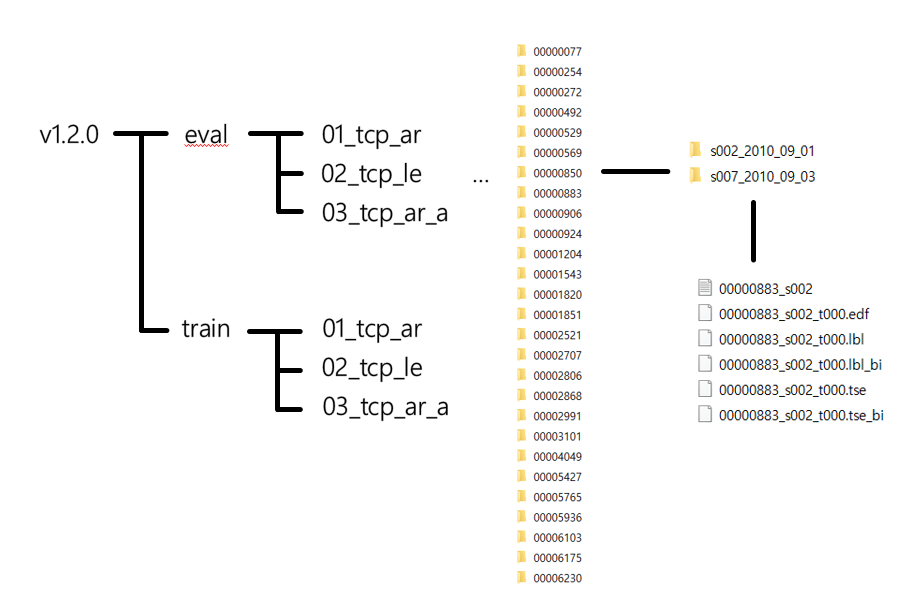

In [2]:
Image("img/01_img.png")

 - eval과 train은 deep learning이나 machine learning을 위해 데이터(환자)가 미리 분류되어 있는 것을 보여줌

 - 또한 01~03은 각각의 환자 데이터를 나누어 놓은 것인데, 여기서 필자는 어떠한 이유로 저런 단어로 나누었는지는 모름

 - 그리고 01~03의 각각의 디렉토리 내부에는 수많은 디렉토리가 있는데 이는 각 환자를 번호로 나타낸 것임
 
 - 이 중 하나를 선택하여 디렉토리 내부를 보면 여러 디렉토리로 나뉘어져 있는데 이는 그 환자로부터 언제 EEG 데이터가 획득 되었는지를 나타냄
 
 - 마지막으로 디렉토리를 하나 선택하여 들어가면 환자 번호가 있는 txt, edf, lbl, tse, tse_bi 등등 많은 파일들이 있는데 우리는 역서 txt와 edf만을 확인해 볼 것임
 
 - txt는 eeg를 획득하였던 환자의 상태 및 여러 임상적인 정보를 기록해놓은 파일
 
 - edf는 eeg 데이터가 저장되어 있는 파일 자체

### MNE library 및 개발 환경

 - MNE는 MEG N EEG의 약자로 Magnetoencephalography와 electroencephalogram와 같은 brain wave 데이터를 다루는데 특화된 library
 
 - command window를 열고 `pip install`을 사용하여 패키지 설치를 진행할 수 있음
 
 > `pip install mne`
 
 - 여기서 진행할 eeg data 분석은 windows 10에서 python 3.6.x 으로 진행하고자 함

### read eeg edf file and check information

 - 먼저 `data` directory에 위에서 다운받은 TUH의 eeg edf 파일을 하나 저장
 
 - 필자는 `00002806_s001_t000.edf`를 선택하였음
 
 - 이 데이터를 mne로 읽고 이 데이터에 대한 information을 확인해보고자 함

In [3]:
# eeg 데이터의 경로를 정의
eeg_data_path = 'data/00002806_s001_t000.edf'

###### edf 파일을 읽기 위해 mne package로부터 method 불러오기

 - edf 파일은 raw한 file structure를 보고 읽어야 함
 
 - 이는 EEG라는 뇌파 **분석**의 입장에서 크게 중요하지 않으므로 mne에서 지원하는 method를 사용하여 평하게 읽을 수 있음
 
 - 이러한 기능을 하는 method는 `mne.io`에 있는 `read_raw_edf`이다
 
 - 아래는 mne 공식 documentation에서 설명하는 함수의 input data arguments와 output data이다
 
 - `input_fname`에 *edf 파일의 경로* 를 입력하고 `preload`를 *True* 로 설정하여 빠르게 데이터를 읽어보자

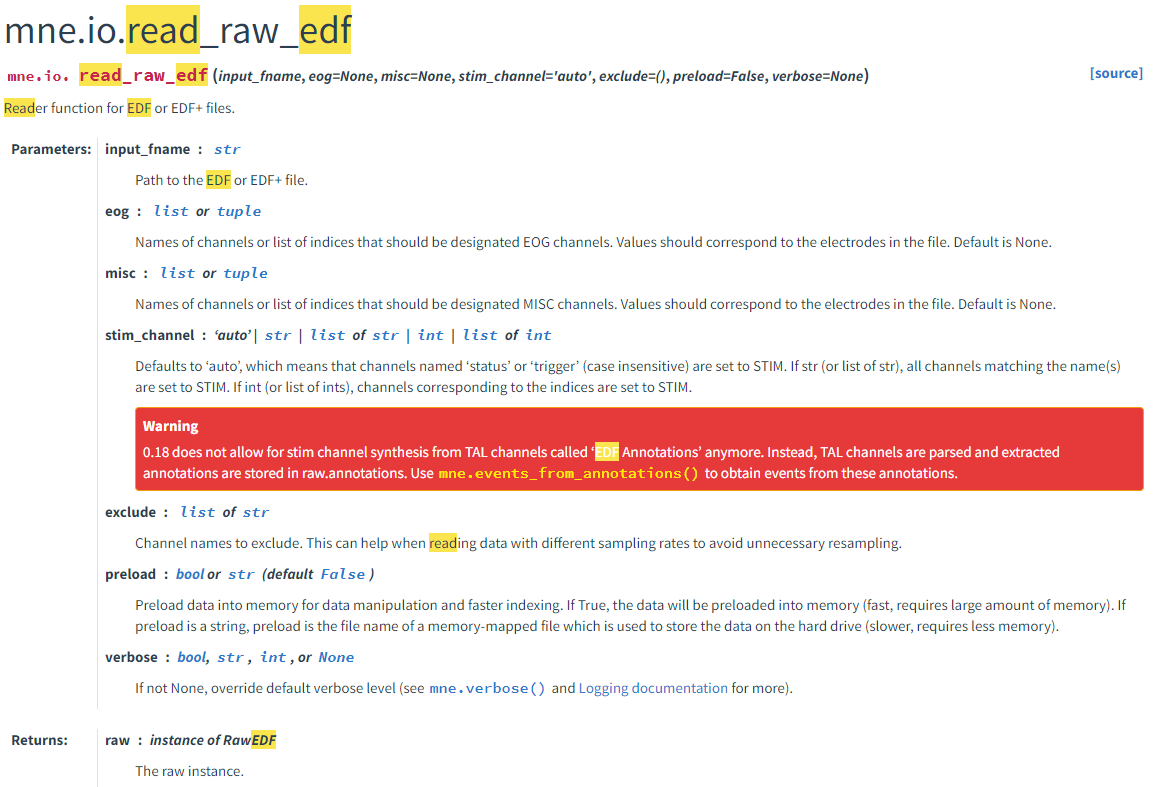

In [4]:
Image("img/02_img.png")

In [5]:
# 사용할 모듈의 함수를 정의
from mne.io import read_raw_edf

In [6]:
# 데이터를 읽기
raw = read_raw_edf(eeg_data_path, preload=True)

Extracting EDF parameters from data/00002806_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10399  =      0.000 ...    25.997 secs...


###### info attribute를 사용한 EEG의 각 종 정보 확인

 - edf 데이터를 method를 사용하여 읽어보았다
 
 - 데이터를 읽을 때 문자로 몇가지 사항이 출력되는 것을 볼 수 있다
 
 - 위의 `read_raw_edf`에서 output data는 `instance of RawEDF`임을 알 수 있다
 
 - 이 `instance of RawEDF`가 가지고 있는 method (함수) 및 attribute (속성)를 확인해보자
 
 - mne의 documentation은 `instance of RawEDF`에 대해 아래의 URL에서 확인할 수 있다
 
 > https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw#mne.io.Raw
 
 - 여기서 우리는 `info`라는 속성 값을 확인하여 이 환자에 대해 EEG 측정할 때의 여러 정보에 대해 확인해볼 것이다

In [7]:
# 데이터의 정보를 확인
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, ...
    chs : list | 32 items (EEG: 31, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 200.0 Hz
    meas_date : tuple | 2004-12-23 15:36:08 GMT
    nchan : int | 32
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 400.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xp

 - 대표적으로 살펴볼만 한 정보들을 나열해보면 아래와 같다
 
 > 1. EEG 측정에 사용된 channel의 이름들 (ch_names)  
 > 2. EEG 측정에 사용된 channel에 대한 간략 정보 (chs)  
 > 3. EEG 측정에 사용된 channel의 개수 (nchan)  
 > 4. EEG 측정에서 기록한 이벤트의 개수 및 정보 (events) 
 > 5. 측정된 EEG data에 대한 high, low pass filter의 수치 값 (highpass, lowpass)  
 > 6. EEG 측정 날짜 (meas_date)  
 > 7. 측정된 EEG의 sampling rate (sfreq)  

###### EEG data plot

 - 뇌파 데이터는 시간에 따라 뇌의 전위 변화를 기록한 것
 
 - 즉, 시간의 축을 기준으로 뇌의 전위변화를 그래프로 나타낼 수 있다
 
 - mne의 `raw instance`는 `plot`이라는 method를 가지고 있으며 arguments에 대한 설명을 mne documentation에서 가져와 보았다
 
 > mne raw plot method : https://mne.tools/stable/generated/mne.io.Raw.html?highlight=plot#mne.io.Raw.plot
 
 - 위에서 load한 데이터인 `RawEDF`로부터 `plot` method를 사용해보자

<IPython.core.display.Javascript object>


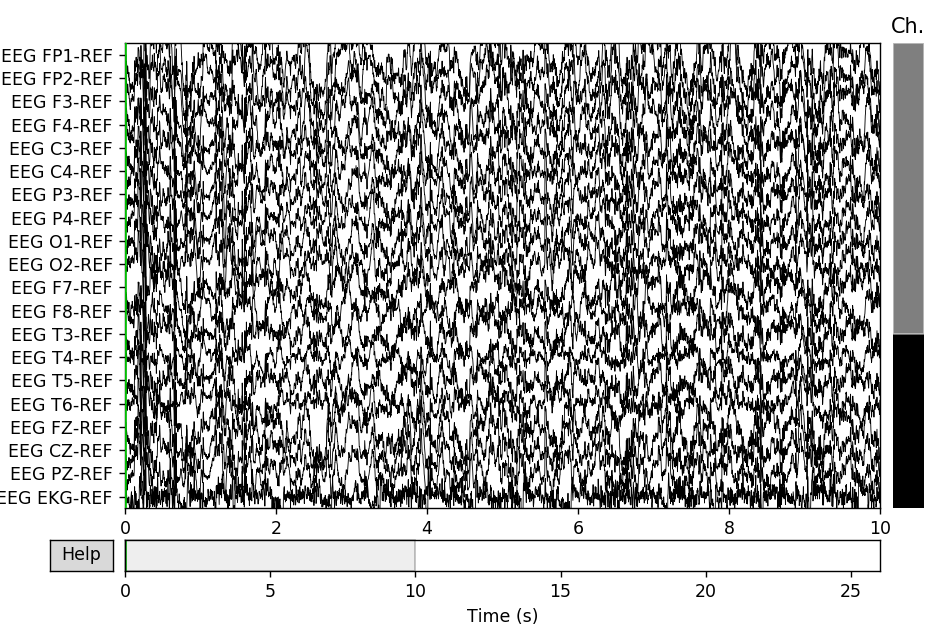

<IPython.core.display.Javascript object>


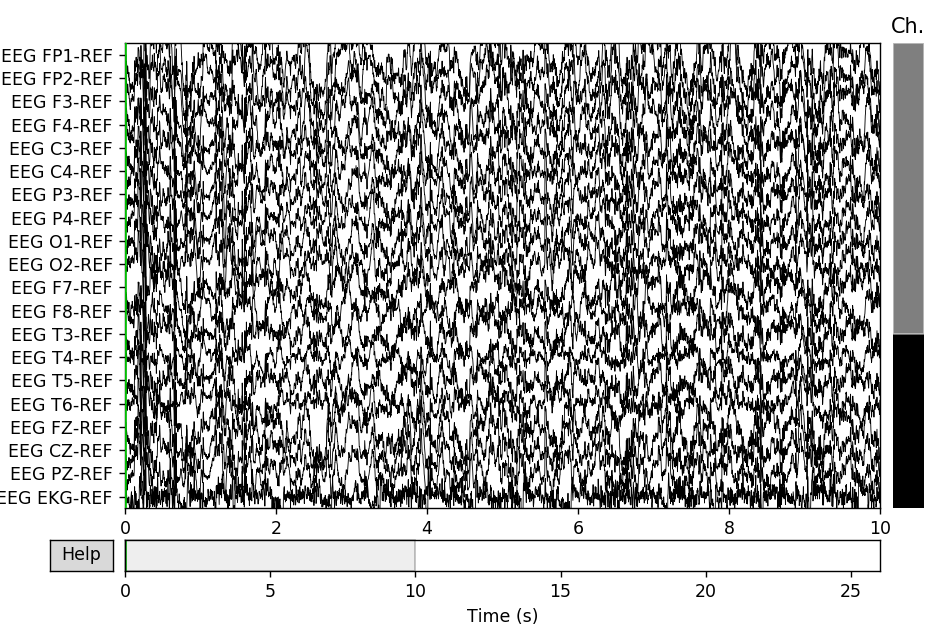

In [8]:
%matplotlib notebook

# EEG를 display
raw.plot()

 - 디스플레이된 EEG 그래프를 살펴보자
 
 - 위에서 언급한 바와 같이 하단에는 시간에 대한 정보가 표기되어 있다
 
 - 또한 왼쪽의 축은 각 채널의 이름이 표기되어 있다
 
 - 이 채널에서 획득된 전위의 변화를 시간에 따라 나타낸 것을 알 수 있다
 
 - 이전에 `info` 속성에서 확인한 바에 따르면 채널의 수는 32개인데 왼쪽의 정보를 보면 이보다 적은 것을 알 수 있다
 
 - 오른쪽의 slide bar를 사용하여 원하는 채널을 찾아볼 수 있다
 
 - 여기서 시간에 따른 전위의 변화의 값을 표기하는 단위가 너무 작은지 서로의 채널에 침범하여 나타내지는 것을 볼 수 있다
 
 - 이 단위를 조절하여 채널별 데이터를 좀 더 깔끔하게 확인해보자
 
 - 단위 값은 위에서 언급한 `plot` method의 arguments 중 하나를 사용하여 바꿀 수 있다
 
 - 이러한 기능을 하는 argument는 `scalings`이다
 
 - `scalings`에 대한 eeg 기본 설정 값을 documentation에서 찾아보면 `20e-6`임을 알 수 있다 (`20 * 1 / 1000000`)
 
 - 이 값 즉, 단위를 4배로 증가시켜 표기되는 그래프의 amplitude를 줄여보자 (`80e-6` = `80 * 1 / 1000000`)
 
 - `plot` method의 argument인 `scalings`을 바꾸어 사용해보자

<IPython.core.display.Javascript object>


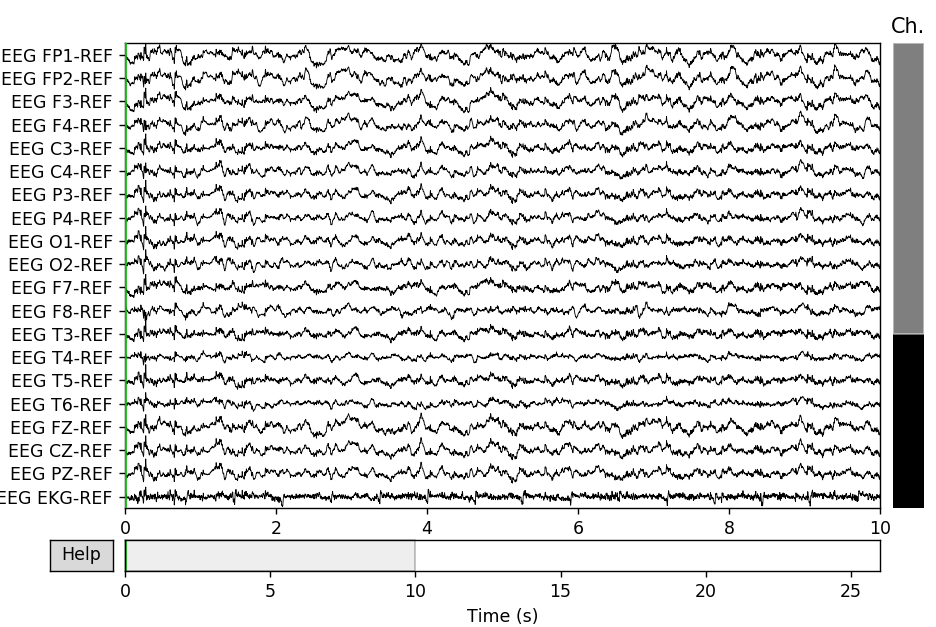

<IPython.core.display.Javascript object>


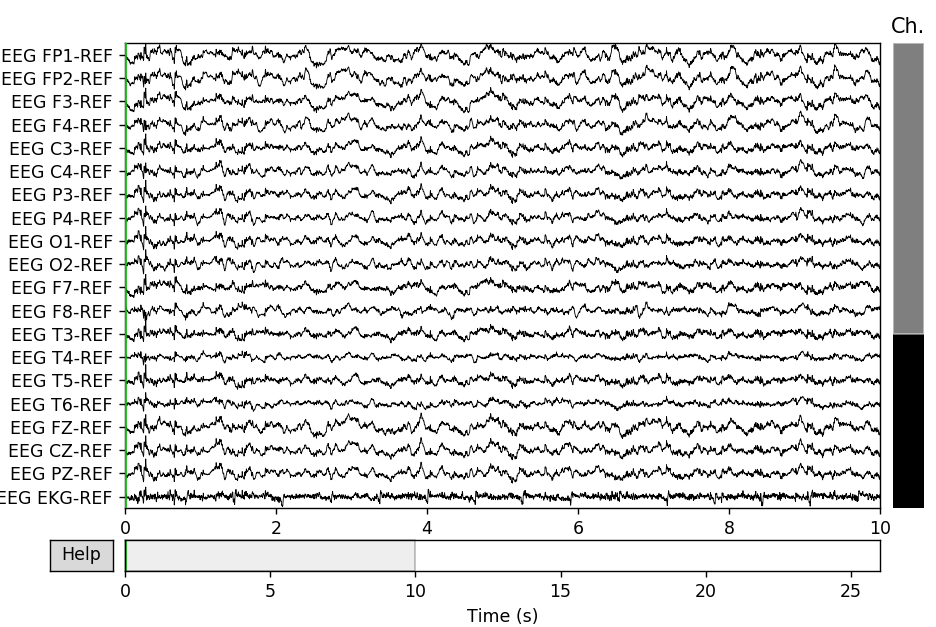

In [9]:
# EEG를 display with scalings
raw.plot(scalings = dict(eeg = 80e-6))

 - 위의 여러 channel 중 EEG와 관련된 channel도 있으나 그렇지 않은 channel 또한 존재한다

 - 여러 channel 중 *심전도 (EKG; electrocardiogram; plot된 그림 내에서는 EEG EKG-REF)* 를 기록한 부분은 EEG가 아니므로 다르게 channel을 설정해주어야 한다
 
 - 동시에 이벤트 (EEG 촬영 중 대상에게 자극을 준 시점 혹은 대상이 자극에 대해 응답한 시점)를 기록한 channel인 *STI 014* 또한 다르게 channel을 설정해주어야 한다
 
 > **NOTE** STI 014와 관련한 자료는 아래의 URL을 참조  
 https://mne.tools/stable/auto_tutorials/intro/plot_20_events_from_raw.html#what-is-a-stim-channel
 
 - `raw instance`가 가지고 있는 `rename_channels`와 `set_channel_types` 메소드를 사용하여 변경하자
 
 - 이후 scailing과 함께 `plot` 메소드를 사용하여 확인해보자
 
 - 또 `info` 속성도 함께 확인하여 처음과 다르게 ECG(EKG) channel을 포함하는지 확인해보자

In [10]:
# 심전도 channel 이름을 좀 더 명확하게 바꾸기
raw.rename_channels(mapping={'EEG EKG-REF': 'EKG'})

# EKG channel에 대하여 설정 변경
raw.set_channel_types(mapping={'EKG': 'ecg'})

# events channel에 대하여 설정 변경
raw.set_channel_types(mapping={'STI 014': 'stim'})

<IPython.core.display.Javascript object>


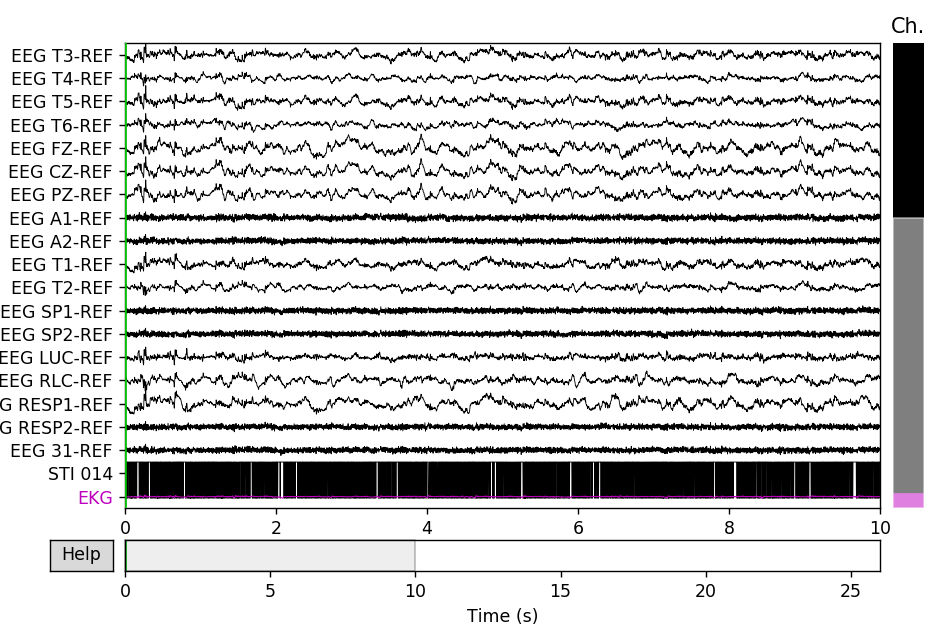

<IPython.core.display.Javascript object>


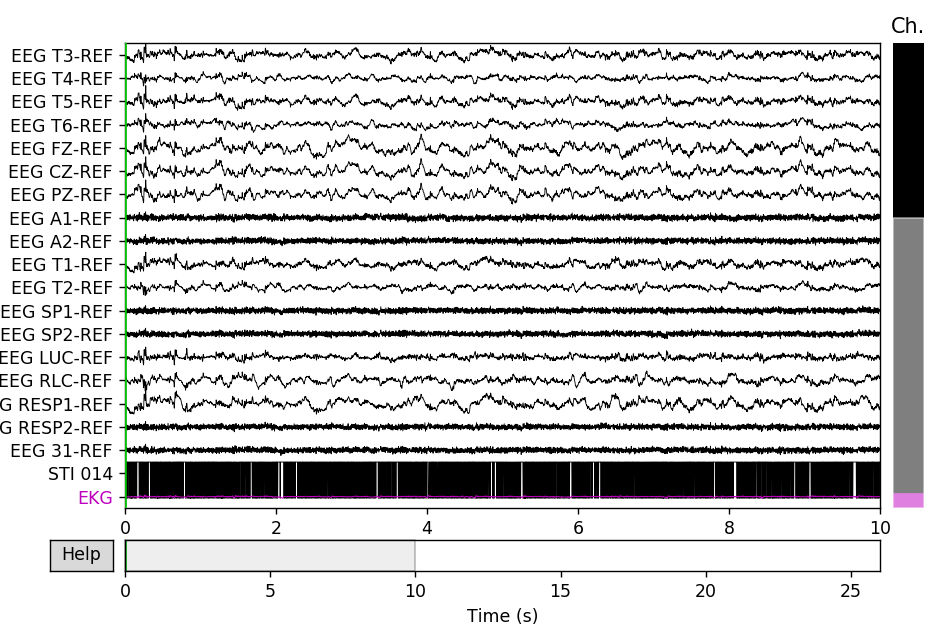

In [11]:
# EEG를 display with scalings
# EKG 부분의 색이 변경됨을 확인
raw.plot(scalings = dict(eeg = 80e-6))

In [13]:
# ECG channel이 추가됨을 확인할 수 있음
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, ...
    chs : list | 32 items (EEG: 30, ECG: 1, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 200.0 Hz
    meas_date : tuple | 2004-12-23 15:36:08 GMT
    nchan : int | 32
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 400.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTyp

 - `info` 속성 중 `ch_names`에서 ECG channel이 추가됨을 확인할 수 있다

 - stim channel인 STI 014는 이전에도 stim channel로 지정되어 있어 이전에 `info`에서 변경된 것이 없음을 확인할 수 있다 